# Capstone - FEMA Hazard Mitigation Regression Analysis

**By Rachel Beery**

**For my capstone I want to study community resilency and predict hazard mitigation success. I will be using the OpenFEMA datasets. My project will use time series  supervised learning modeling to predict hazard mitigation success.**

**In this project we are using a regression analysis model to understand the ROI of hazard mitigation costs in USD. By understanding these patterns we will then provide recommendations on how to better allocate hazard mitigation funds in the future.**

Source: https://www.fema.gov/about/openfema/data-sets

### Goals: 
- Make a linear regression to see if there is a pattern overtime in hazard mitigation.
- Make a linear regression to see if there is a pattern overtime in recovery funds.
- Somehow bring these two together to see if certain hazard mitigation had more ROI
- Make categoricals for years

# Data Exploration and Cleaning

In [1]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

import math
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
df = pd.read_csv(r"HazardMitigationAssistanceProjects - HazardMitigationAssistanceProjects.csv")
df.head()

,region,stateNumberCode,state,countyCode,county,programArea,projectIdentifier,projectType,projectTitle,projectCounties,numberOfProperties,numberOfFinalProperties,status,subgrantee,costSharePercentage,projectAmount,federalShareObligated,programFy,dateInitiallyApproved,dateApproved,dateClosed,granteeTribalIndicator,grantee,disasterNumber,benefitCostRatio,netValueBenefits,subgranteeTribalIndicator,hash,lastRefresh,id
0,6,48,Texas,167.000,Galveston,HMGP,DR-1999-0061-R,"400.1: Utility Protective Measures (Electric, ...",UTMB Elevation of Electrical Services Bldg 9,GALVESTON,0,0,Closed,UNIVERSITY OF TEXAS MEDICAL BRANCH,0.750,402910.000,302181.820,2011,2013-12-10T05:00:00.000Z,2020-02-06T05:00:00.000Z,2020-02-06T05:00:00.000Z,0.000,Statewide,1999.000,4.041,2969310.000,0.000,a959dc8cb69df0bd7f236b2021101501,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd79
1,5,18,Indiana,21.000,Clay,HMGP,DR-1997-0014-R,200.1: Acquisition of Private Real Property (S...,City of Brazil Phase 2,CLAY,13,6,Closed,Brazil,0.620,366071.000,227383.000,2011,2013-04-09T04:00:00.000Z,2019-11-25T05:00:00.000Z,2019-11-25T05:00:00.000Z,0.000,Statewide,1997.000,1.357,961452.000,0.000,cb8464b16e232b502ef9c8a3d385752b,2020-09-17T18:15:38.771Z,5f63a7ca31a8c6681c9dfd81
2,7,19,Iowa,153.000,Polk,HMGP,DR-1998-0022-P,91.1: Local Multihazard Mitigation Plan,Polk Countywide Multi-Jurisdiction Multi-Hazar...,POLK,0,0,Closed,Polk (County),0.750,96965.000,72724.000,2011,2012-05-10T04:00:00.000Z,2015-07-28T04:00:00.000Z,2015-07-29T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,bd467ece18ecc6c8a40b824175b7f029,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd84
3,2,36,New York,83.000,Rensselaer,HMGP,DR-4020-0064-F,600.1: Warning Systems (as a Component of a Pl...,Canal Flood Warning System,OSWEGO; ONTARIO; SARATOGA; SCHENECTADY; SCHOHA...,0,0,Closed,THRUWY AUTH/NYS CANAL CORP,1.000,5932500.000,5932500.000,2011,2013-11-12T05:00:00.000Z,2014-11-07T05:00:00.000Z,2018-01-24T05:00:00.000Z,0.000,Statewide,4020.000,0.000,0.000,0.000,ab6774d20b7cd64215ded6135377cc1e,2021-01-19T17:38:38.392Z,5f63a7ca31a8c6681c9dfd87
4,7,19,Iowa,141.000,O'Brien,HMGP,DR-1998-0013-F,600.1: Warning Systems (as a Component of a Pl...,Sheldon Outdoor Warning Sirens Project,O'BRIEN,0,0,Closed,Sheldon,0.750,34245.000,25683.000,2011,2012-05-03T04:00:00.000Z,2012-05-03T04:00:00.000Z,2013-09-26T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,62fff845e7929eb2587b530b69ae2f93,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd88


In [4]:
# How big is this dataset?
df.shape

(29628, 30)

In [5]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 30 columns):
region                       29628 non-null int64
stateNumberCode              29628 non-null int64
state                        29628 non-null object
countyCode                   27586 non-null float64
county                       27586 non-null object
programArea                  29628 non-null object
projectIdentifier            29628 non-null object
projectType                  29301 non-null object
projectTitle                 29450 non-null object
projectCounties              27859 non-null object
numberOfProperties           29628 non-null int64
numberOfFinalProperties      29628 non-null int64
status                       29628 non-null object
subgrantee                   29133 non-null object
costSharePercentage          29608 non-null float64
projectAmount                29608 non-null float64
federalShareObligated        29628 non-null float64
programFy               

In [6]:
df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
                         'granteeTribalIndicator', 'dateInitiallyApproved', 
                         'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', 
                         'projectIdentifier', 'projectCounties', 'numberOfProperties',
                        'status', 'costSharePercentage', 'federalShareObligated', 'grantee', 
                         'disasterNumber', 'hash', 
                         'state','county', 'countyCode', 'projectType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 9 columns):
region              29628 non-null int64
stateNumberCode     29628 non-null int64
programArea         29628 non-null object
projectAmount       29608 non-null float64
programFy           29628 non-null int64
dateApproved        29347 non-null object
benefitCostRatio    29628 non-null float64
netValueBenefits    24707 non-null float64
id                  29628 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 2.0+ MB


In [7]:
df['projectAmount'].fillna(0.0, axis = 0, inplace=True)
df['projectAmount'].value_counts()

40000.000      186
50000.000      184
100000.000     139
20000.000      120
25000.000      119
              ... 
1252647.000      1
840671.000       1
40254.000        1
31066.670        1
573403.000       1
Name: projectAmount, Length: 24108, dtype: int64

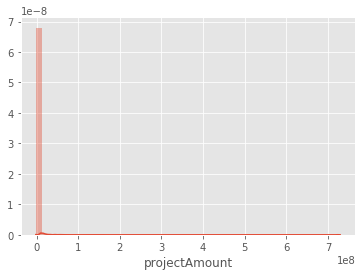

In [8]:
sns.distplot(df.projectAmount)

In [9]:
df['netValueBenefits'].fillna(0.0, axis = 0, inplace=True)
df['netValueBenefits'].value_counts()

0.000          14662
21420.000        318
1.000            152
276000.000        96
175000.000        36
               ...  
775151.000         1
387575.000         1
1222617.000        1
3624869.000        1
16552.000          1
Name: netValueBenefits, Length: 13097, dtype: int64

In [10]:
# The outliers need to be addressed
df = df[(df['projectAmount']>0)]

In [11]:
#df['countyCode'].fillna(0.0, axis = 0, inplace=True)
#df['countyCode'].value_counts()

In [12]:
#df['countyCode'] = df['countyCode'].astype('int64')

In [13]:
df.describe()

,region,stateNumberCode,projectAmount,programFy,benefitCostRatio,netValueBenefits
count,29576.000,29576.000,29576.000,29576.000,29576.000,29576.000
mean,5.171,27.842,816740.943,2006.725,171.855,8274873.120
std,2.420,17.185,8025573.698,7.572,20386.572,739378700.544
min,1.000,1.000,1.000,1989.000,0.000,0.000
25%,4.000,12.000,37231.500,2001.000,0.000,0.000
50%,5.000,27.000,115076.000,2008.000,0.846,1.000
75%,7.000,40.000,420000.000,2013.000,1.665,646332.750
max,10.000,78.000,729000000.000,2020.000,2479069.620,89843962103.000


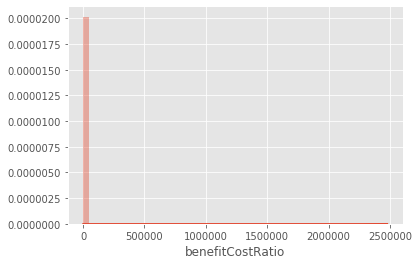

In [14]:
sns.distplot(df.benefitCostRatio)

In [15]:
df['benefitCostRatio'] = df['benefitCostRatio'].astype('int64')
df['projectAmount'] = df['projectAmount'].astype('int64')
df['netValueBenefits'] = df['netValueBenefits'].astype('int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29627
Data columns (total 9 columns):
region              29576 non-null int64
stateNumberCode     29576 non-null int64
programArea         29576 non-null object
projectAmount       29576 non-null int64
programFy           29576 non-null int64
dateApproved        29295 non-null object
benefitCostRatio    29576 non-null int64
netValueBenefits    29576 non-null int64
id                  29576 non-null object
dtypes: int64(6), object(3)
memory usage: 2.3+ MB


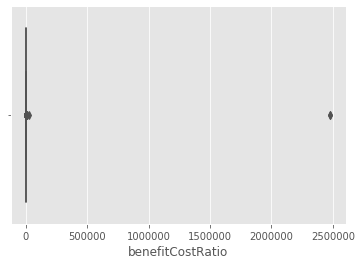

In [17]:
sns.boxplot(x=df['benefitCostRatio'])

In [18]:
#df['benefitCostRatio'] = df['benefitCostRatio'] < 500

In [19]:
df.head()

,region,stateNumberCode,programArea,projectAmount,programFy,dateApproved,benefitCostRatio,netValueBenefits,id
0,6,48,HMGP,402910,2011,2020-02-06T05:00:00.000Z,4,2969310,5f63a7ca31a8c6681c9dfd79
1,5,18,HMGP,366071,2011,2019-11-25T05:00:00.000Z,1,961452,5f63a7ca31a8c6681c9dfd81
2,7,19,HMGP,96965,2011,2015-07-28T04:00:00.000Z,0,0,5f63a7ca31a8c6681c9dfd84
3,2,36,HMGP,5932500,2011,2014-11-07T05:00:00.000Z,0,0,5f63a7ca31a8c6681c9dfd87
4,7,19,HMGP,34245,2011,2012-05-03T04:00:00.000Z,0,0,5f63a7ca31a8c6681c9dfd88


In [20]:
df['benefitCostRatio'] = np.clip(df['benefitCostRatio'], a_max=50000, a_min=None)

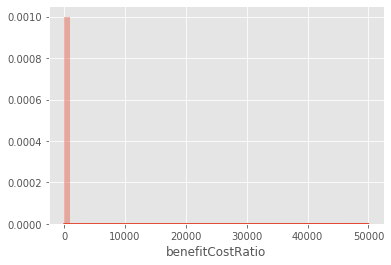

In [21]:
sns.distplot(df.benefitCostRatio)

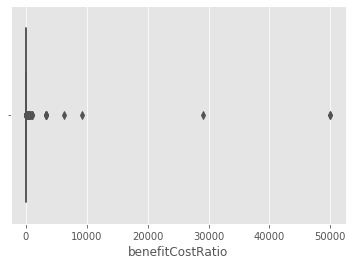

In [22]:
sns.boxplot(x=df['benefitCostRatio'])

In [23]:
df['benefitCostRatio'] = np.clip(df['benefitCostRatio'], a_max=10000, a_min=None)

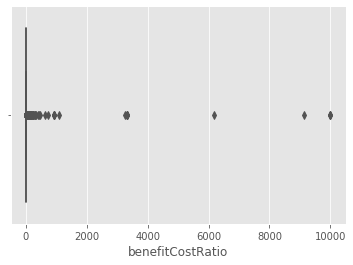

In [24]:
sns.boxplot(x=df['benefitCostRatio'])

In [25]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 23949
programFy 32
dateApproved 11220
benefitCostRatio 119
netValueBenefits 13068
id 29576


In [26]:
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [27]:
df.describe()

,region,stateNumberCode,projectAmount,programFy,benefitCostRatio,netValueBenefits
count,29576.000,29576.000,29576.000,29576.000,29576.000,29576.000
mean,5.171,27.842,816740.910,2006.725,4.051,8274873.120
std,2.420,17.185,8025573.698,7.572,127.856,739378700.544
min,1.000,1.000,1.000,1989.000,0.000,0.000
25%,4.000,12.000,37231.500,2001.000,0.000,0.000
50%,5.000,27.000,115076.000,2008.000,0.000,1.000
75%,7.000,40.000,420000.000,2013.000,1.000,646332.750
max,10.000,78.000,729000000.000,2020.000,10000.000,89843962103.000


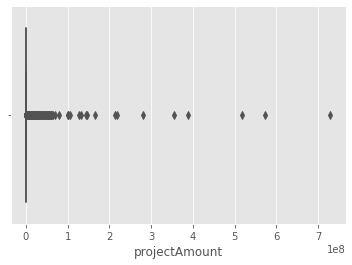

In [28]:
# Looks like projectAmount has outliers - Let's plot it
sns.boxplot(x=df['projectAmount'])

In [29]:
df['projectAmount'].sum()

24155929157

In [30]:
df['projectAmount'].median()

115076.0

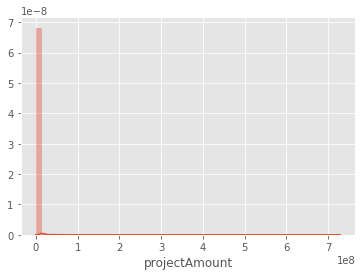

In [31]:
sns.distplot(df.projectAmount)

In [32]:
# Do we have nulls?
df.isna().sum()

region                0
stateNumberCode       0
programArea           0
projectAmount         0
programFy             0
dateApproved        281
benefitCostRatio      0
netValueBenefits      0
id                    0
dtype: int64

## Questions we can answer without linear regression

In [33]:
# Plotting Price with the categories:
#def categorical_plots(df):
 #   for col in df.select_dtypes('category'):
  #      fig, ax = plt.subplots(figsize=(10,6))
   #     sns.barplot(x=col, y='benefitCostRatio', data=df, palette="colorblind")
    #    ax.set_title(f"{col} vs projectAmount", fontsize=30)
     #   plt.xticks(rotation=45)
      #  plt.show()

In [34]:
#categorical_plots(df)

As we can see from the following vizuals above SRL () are the most costly hazard mitigation area that is being spent on

# Outlier Removal

In [35]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

#def outliersiqr(data):
 #   q1 = np.percentile(data, 25)
  #    q3 = np.percentile(data, 75)
   # iqr = q3 - q1
    #threshold = iqr * 1.5
    #outliers = (data < q1 - threshold) | (data > q3 + threshold)
    #outliers = pd.Series(outliers, index=data.index)
    #return outliers

In [36]:
# Function to make an outlier column which we will then remove outliers from
#def outlierscolumn(df, columns, verbose=True):
 #   new_df = df.copy()
  #  for col in columns:
   #     outliers = outliersiqr(new_df[col])
    #    if verbose:
     #       print(f'{outliers.sum()} outliers found in {col}')
      #  new_df[f'{col}_outliers'] = outliers
   # return new_df

In [37]:
# Feeding in the numerical columns for identifying outliers
#num_cols = list(df.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
#df2 = outlierscolumn(df, num_cols)

In [38]:
#df2.head()

In [39]:
# Creating a list of the outlier columns
#outliercols = []
#for col in df2.columns:
 #   if 'outliers' in col:
  #      outliercols.append(col)
#outliercols

In [40]:
#df2.shape

In [41]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
#df2= df2.drop(columns=['region_outliers', 'stateNumberCode_outliers', 'programFy_outliers'])

In [42]:
# Creating a list of the outlier columns
#outliercols = []
#for col in df2.columns:
 #   if 'outliers' in col:
  #      outliercols.append(col)
#outliercols

In [43]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
#for col in outliercols:
 #   df2 = df2[(df2[col]==False)]
#df2.shape

In [44]:
# Dropping the outlier columns that were added
#for col in outliercols:
 #   df2.drop(columns=[col], axis=1, inplace=True)

In [45]:
df.region.value_counts()

4     8408
6     4163
5     2611
9     2496
7     2430
2     2163
3     2021
1     1964
8     1882
10    1438
Name: region, dtype: int64

In [46]:
df.stateNumberCode.value_counts()

12    2633
6     1858
1     1646
48    1232
22    1155
40    1153
19     997
13     940
36     842
28     842
34     839
21     735
37     725
46     615
42     596
53     590
39     542
29     539
27     527
55     522
51     511
38     504
5      472
31     456
45     453
50     448
20     438
47     434
25     433
26     417
54     384
17     372
41     369
72     353
23     349
24     339
33     337
8      270
2      267
9      265
30     265
18     231
16     212
4      162
35     151
10     144
49     143
44     132
78     129
15     112
32     109
56      85
69      82
66      75
11      47
60      45
64      39
68       7
70       7
Name: stateNumberCode, dtype: int64

In [47]:
# Very important category as it shows why the mitigation is being done
df.programArea.value_counts()

HMGP    22497
PDM      3906
FMA      2581
LPDM      253
SRL       241
RFC        98
Name: programArea, dtype: int64

Text(0.5, 1.0, 'Program Area vs. Benefit Cost Ratio')

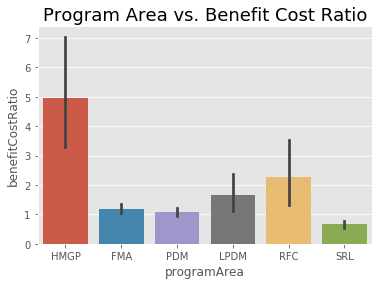

In [48]:
ax = sns.barplot(x="programArea", y="benefitCostRatio", data=df)
ax.set_title('Program Area vs. Benefit Cost Ratio', fontsize = 18)

In [49]:
#df.projectIdentifier.value_counts()

In [50]:
df.projectAmount.value_counts()

40000      188
50000      185
100000     140
25000      120
20000      120
          ... 
373756       1
140286       1
3200000      1
23553        1
65536        1
Name: projectAmount, Length: 23949, dtype: int64

In [51]:
df.programFy.value_counts()

2011    2311
2017    1949
2005    1860
2008    1681
2013    1370
1998    1290
2009    1285
2010    1244
2007    1187
2004    1182
2016    1116
2001    1059
2003     976
2014     972
2018     937
2015     903
1997     903
1994     900
1996     846
2002     817
2012     662
1999     636
2000     597
2006     595
2019     593
1993     420
1992     369
1995     358
1990     241
1991     172
1989     132
2020      13
Name: programFy, dtype: int64

In [52]:
#df = df[(df['projectAmount']>1998)]

In [53]:
df.benefitCostRatio.value_counts()

0       14965
1        8400
2        2109
3        1157
4         680
        ...  
84          1
316         1
412         1
476         1
9131        1
Name: benefitCostRatio, Length: 119, dtype: int64

In [54]:
df.netValueBenefits.value_counts()

0          14641
21420        318
1            152
276000        96
552000        36
           ...  
2159860        1
54512          1
7570666        1
683239         1
362649         1
Name: netValueBenefits, Length: 13068, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29627
Data columns (total 9 columns):
region              29576 non-null int64
stateNumberCode     29576 non-null int64
programArea         29576 non-null object
projectAmount       29576 non-null int64
programFy           29576 non-null int64
dateApproved        29295 non-null object
benefitCostRatio    29576 non-null int64
netValueBenefits    29576 non-null int64
id                  29576 non-null object
dtypes: int64(6), object(3)
memory usage: 3.5+ MB


In [56]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 23949
programFy 32
dateApproved 11220
benefitCostRatio 119
netValueBenefits 13068
id 29576


# Data Prep for Modeling

In [57]:
#df['region'] = df['region'].astype('category') 
#df['stateNumberCode'] = df['stateNumberCode'].astype('category') 
#df['programArea'] = df['programArea'].astype('category')

In [58]:
# pd.get_dummies(df)

In [59]:
# Making a list of the program Areas 
# We will make vizualizations of these
programAreas = list(df['programArea'].value_counts().head(6).index)
programAreas

['HMGP', 'PDM', 'FMA', 'LPDM', 'SRL', 'RFC']

In [60]:
df = df[df['programArea'].isin(programAreas)]
df['programArea'].value_counts()

HMGP    22497
PDM      3906
FMA      2581
LPDM      253
SRL       241
RFC        98
Name: programArea, dtype: int64

In [61]:
df.head()

,region,stateNumberCode,programArea,projectAmount,programFy,dateApproved,benefitCostRatio,netValueBenefits,id
0,6,48,HMGP,402910,2011,2020-02-06T05:00:00.000Z,4,2969310,5f63a7ca31a8c6681c9dfd79
1,5,18,HMGP,366071,2011,2019-11-25T05:00:00.000Z,1,961452,5f63a7ca31a8c6681c9dfd81
2,7,19,HMGP,96965,2011,2015-07-28T04:00:00.000Z,0,0,5f63a7ca31a8c6681c9dfd84
3,2,36,HMGP,5932500,2011,2014-11-07T05:00:00.000Z,0,0,5f63a7ca31a8c6681c9dfd87
4,7,19,HMGP,34245,2011,2012-05-03T04:00:00.000Z,0,0,5f63a7ca31a8c6681c9dfd88


In [62]:
#HMFP = list(df['programArea'].value_counts().head(1).index)
#HMFP

In [63]:
df['dateApproved'].value_counts()

2002-09-27T04:00:00.000Z    82
2020-10-26T04:00:00.000Z    56
2002-09-17T04:00:00.000Z    45
2002-09-30T04:00:00.000Z    44
2009-05-14T04:00:00.000Z    39
                            ..
2014-04-25T16:56:04.000Z     1
2014-05-05T23:11:41.000Z     1
2009-09-10T21:44:54.000Z     1
1996-08-29T04:00:00.000Z     1
2010-07-23T01:21:21.000Z     1
Name: dateApproved, Length: 11220, dtype: int64

In [64]:
df['dateApproved'] = df['dateApproved'].str.split('T').str[0]

In [65]:
df['dateApproved'].value_counts()

2002-09-27    82
2020-10-26    56
2002-09-17    45
2002-09-30    44
2009-05-14    40
              ..
2015-04-28     1
2001-09-30     1
1992-11-02     1
2009-09-28     1
2000-05-15     1
Name: dateApproved, Length: 6049, dtype: int64

In [66]:
df['dateApproved'] = pd.to_datetime(df['dateApproved'])

In [67]:
# Make Date the index 
df['date'] = pd.to_datetime(df['dateApproved'])
df.set_index('date', inplace=True)
df

,region,stateNumberCode,programArea,projectAmount,programFy,dateApproved,benefitCostRatio,netValueBenefits,id
date,,,,,,,,,
2020-02-06,6,48,HMGP,402910,2011,2020-02-06,4,2969310,5f63a7ca31a8c6681c9dfd79
2019-11-25,5,18,HMGP,366071,2011,2019-11-25,1,961452,5f63a7ca31a8c6681c9dfd81
2015-07-28,7,19,HMGP,96965,2011,2015-07-28,0,0,5f63a7ca31a8c6681c9dfd84
2014-11-07,2,36,HMGP,5932500,2011,2014-11-07,0,0,5f63a7ca31a8c6681c9dfd87
2012-05-03,7,19,HMGP,34245,2011,2012-05-03,0,0,5f63a7ca31a8c6681c9dfd88
...,...,...,...,...,...,...,...,...,...
2021-01-04,9,6,HMGP,423000,2019,2021-01-04,1,9391485,600324d6a41acb24f2bbc219
2021-01-15,4,37,HMGP,1708540,2018,2021-01-15,0,0,600324d8a41acb24f2bbd776
2021-01-13,2,36,HMGP,2882727,2019,2021-01-13,1,2927736,600324d8a41acb24f2bbd779


In [68]:
df.index

DatetimeIndex(['2020-02-06', '2019-11-25', '2015-07-28', '2014-11-07',
               '2012-05-03', '2017-07-06', '2015-11-09', '2014-09-15',
               '2017-04-27', '2016-04-11',
               ...
               '2021-01-07', '2020-12-04', '2021-01-11', '2021-01-14',
               '2021-01-12', '2021-01-04', '2021-01-15', '2021-01-13',
               '2021-01-08', '2021-01-14'],
              dtype='datetime64[ns]', name='date', length=29576, freq=None)

In [69]:
# The 'MS' string groups the data in buckets by start of the month
df.groupby(['programArea']).resample('MS').count()['id']

programArea  date      
FMA          1996-04-01    2
             1996-05-01    0
             1996-06-01    0
             1996-07-01    0
             1996-08-01    0
                          ..
SRL          2016-02-01    0
             2016-03-01    0
             2016-04-01    0
             2016-05-01    0
             2016-06-01    1
Name: id, Length: 1212, dtype: int64

In [70]:
freq = 'MS'

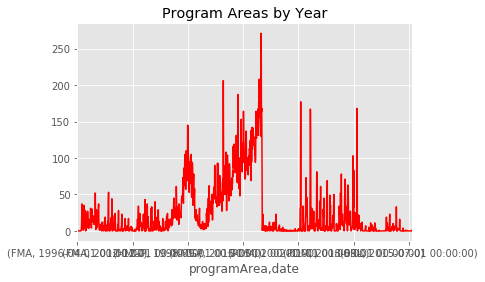

In [71]:
ts_programarea = df.groupby(['programArea']).resample(freq).count()['id']
ts_programarea.plot.line(color='red')
plt.title('Program Areas by Year')
plt.show()

In [72]:
programAreas

['HMGP', 'PDM', 'FMA', 'LPDM', 'SRL', 'RFC']

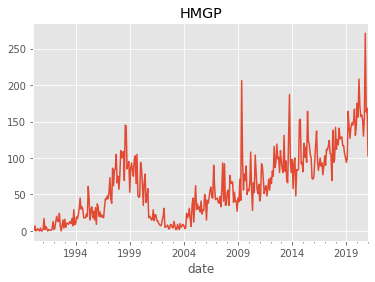

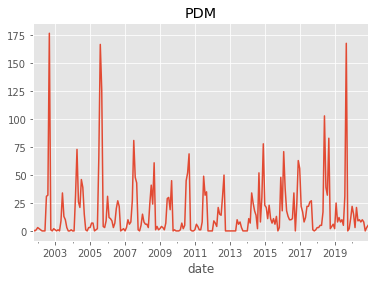

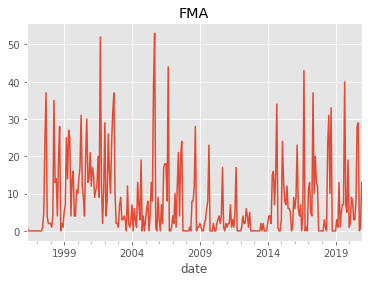

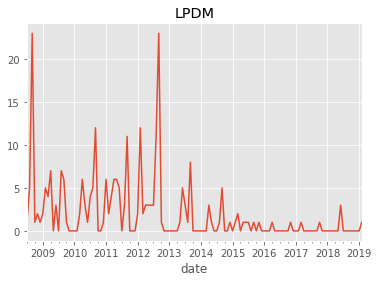

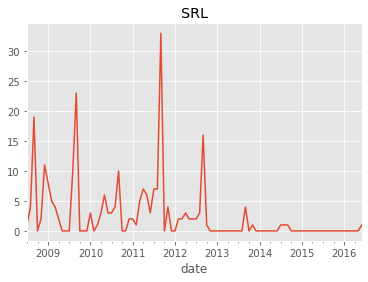

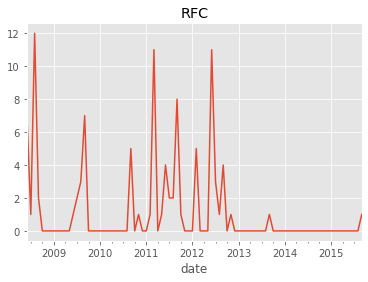

In [73]:
progAreas = {}
for area in programAreas:
    ts = ts_programarea[area].asfreq(freq).rename(area)
    plt.figure()
    ts.plot(title=area)
    progAreas[area] = ts

In [74]:
df = pd.DataFrame(progAreas) 
df

,HMGP,PDM,FMA,LPDM,SRL,RFC
date,,,,,,
1990-02-01,1,nan,nan,nan,nan,nan
1990-03-01,1,nan,nan,nan,nan,nan
1990-04-01,7,nan,nan,nan,nan,nan
1990-05-01,0,nan,nan,nan,nan,nan
1990-06-01,1,nan,nan,nan,nan,nan
...,...,...,...,...,...,...
2020-09-01,158,8.000,29.000,nan,nan,nan
2020-10-01,271,0.000,0.000,nan,nan,nan
2020-11-01,163,3.000,1.000,nan,nan,nan


In [75]:
df.fillna(0, inplace=True)

In [76]:
df.index

DatetimeIndex(['1990-02-01', '1990-03-01', '1990-04-01', '1990-05-01',
               '1990-06-01', '1990-07-01', '1990-08-01', '1990-09-01',
               '1990-10-01', '1990-11-01',
               ...
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', name='date', length=372, freq='MS')

In [77]:
df = df.loc['2008-01-01':'2021-01-01']

# Time Series Modeling

### One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

# Defining (p,d,q)
p = auto-regressive part of model. Incorporates the effect of past values into our model.

d = Integrated component of an ARIMA model. Concerned with the amount of differencing as it identifies the number of lag values to subtract from the current observation.  

q = Moving average part of the model. Used to set the error of the model as a linear combination of the error values observed at previous time point in the past.

ARIMA(p,d,q) = seasonality, trend, and noise in datasets

In [78]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [79]:
df

,HMGP,PDM,FMA,LPDM,SRL,RFC
date,,,,,,
2008-01-01,53,15.000,0.000,0.000,0.000,0.000
2008-02-01,56,8.000,0.000,0.000,0.000,0.000
2008-03-01,35,6.000,0.000,0.000,0.000,0.000
2008-04-01,76,6.000,1.000,0.000,0.000,0.000
2008-05-01,65,3.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...
2020-09-01,158,8.000,29.000,0.000,0.000,0.000
2020-10-01,271,0.000,0.000,0.000,0.000,0.000
2020-11-01,163,3.000,1.000,0.000,0.000,0.000


In [80]:
ts_HMGP = df['HMGP']
ts_HMGP

date
2008-01-01     53
2008-02-01     56
2008-03-01     35
2008-04-01     76
2008-05-01     65
             ... 
2020-09-01    158
2020-10-01    271
2020-11-01    163
2020-12-01    168
2021-01-01    103
Freq: MS, Name: HMGP, Length: 157, dtype: int64

In [81]:
# Time Series for Hurricanes
ts_PDM = df['PDM']
ts_PDM

date
2008-01-01   15.000
2008-02-01    8.000
2008-03-01    6.000
2008-04-01    6.000
2008-05-01    3.000
              ...  
2020-09-01    8.000
2020-10-01    0.000
2020-11-01    3.000
2020-12-01    5.000
2021-01-01    0.000
Freq: MS, Name: PDM, Length: 157, dtype: float64

In [82]:
# Time Series for Hurricanes
ts_FMA = df['FMA']
ts_FMA

date
2008-01-01    0.000
2008-02-01    0.000
2008-03-01    0.000
2008-04-01    1.000
2008-05-01    0.000
              ...  
2020-09-01   29.000
2020-10-01    0.000
2020-11-01    1.000
2020-12-01   13.000
2021-01-01    0.000
Freq: MS, Name: FMA, Length: 157, dtype: float64

In [83]:
# Time Series for Hurricanes
ts_LPDM = df['LPDM']
ts_LPDM

date
2008-01-01   0.000
2008-02-01   0.000
2008-03-01   0.000
2008-04-01   0.000
2008-05-01   0.000
              ... 
2020-09-01   0.000
2020-10-01   0.000
2020-11-01   0.000
2020-12-01   0.000
2021-01-01   0.000
Freq: MS, Name: LPDM, Length: 157, dtype: float64

In [84]:
# Time Series for Hurricanes
ts_SRL = df['SRL']
ts_SRL

date
2008-01-01   0.000
2008-02-01   0.000
2008-03-01   0.000
2008-04-01   0.000
2008-05-01   0.000
              ... 
2020-09-01   0.000
2020-10-01   0.000
2020-11-01   0.000
2020-12-01   0.000
2021-01-01   0.000
Freq: MS, Name: SRL, Length: 157, dtype: float64

In [85]:
# Time Series for Hurricanes
ts_RFC = df['RFC']
ts_RFC

date
2008-01-01   0.000
2008-02-01   0.000
2008-03-01   0.000
2008-04-01   0.000
2008-05-01   0.000
              ... 
2020-09-01   0.000
2020-10-01   0.000
2020-11-01   0.000
2020-12-01   0.000
2021-01-01   0.000
Freq: MS, Name: RFC, Length: 157, dtype: float64

In [ ]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_RFC,
                                            order=comb,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 0, 3, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 1, 3, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 2, 3, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 3, 0, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0, 3, 1, 12)12 : AIC Calculated =672.9951825357386
ARIMA (0, 0, 0) x (0

ARIMA (0, 0, 1) x (3, 2, 3, 12)12 : AIC Calculated =665.1431277177464
ARIMA (0, 0, 1) x (3, 3, 0, 12)12 : AIC Calculated =665.1431277177464
ARIMA (0, 0, 1) x (3, 3, 1, 12)12 : AIC Calculated =665.1431277177464
ARIMA (0, 0, 1) x (3, 3, 2, 12)12 : AIC Calculated =665.1431277177464
ARIMA (0, 0, 1) x (3, 3, 3, 12)12 : AIC Calculated =665.1431277177464
ARIMA (0, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 0, 3, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 1, 3, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =658.1940387653735
ARIMA (0, 0, 2) x (0

ARIMA (0, 0, 3) x (3, 0, 3, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 1, 0, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 1, 1, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 1, 2, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 1, 3, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 2, 0, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 2, 1, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 2, 2, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 2, 3, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 3, 0, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 3, 1, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 3, 2, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 0, 3) x (3, 3, 3, 12)12 : AIC Calculated =653.5354947538339
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =734.2151516405654
ARIMA (0, 1, 0) x (0

ARIMA (0, 1, 1) x (2, 3, 3, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 0, 0, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 0, 1, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 0, 2, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 0, 3, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 1, 0, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 1, 1, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 1, 2, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 1, 3, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 2, 0, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 2, 1, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 2, 2, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 2, 3, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3, 3, 0, 12)12 : AIC Calculated =643.9905643010833
ARIMA (0, 1, 1) x (3

ARIMA (0, 1, 3) x (2, 1, 3, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 2, 0, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 2, 1, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 2, 2, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 2, 3, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 3, 0, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 3, 1, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 3, 2, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (2, 3, 3, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (3, 0, 0, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (3, 0, 1, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (3, 0, 2, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (3, 0, 3, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (3, 1, 0, 12)12 : AIC Calculated =639.5759273141996
ARIMA (0, 1, 3) x (3

ARIMA (0, 2, 1) x (1, 3, 1, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (1, 3, 2, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (1, 3, 3, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 0, 3, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 1, 3, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =732.7054976732118
ARIMA (0, 2, 1) x (2

ARIMA (0, 2, 3) x (1, 0, 3, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 1, 0, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 1, 1, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 1, 2, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 1, 3, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 2, 0, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 2, 1, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 2, 2, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 2, 3, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 3, 0, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 3, 1, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 3, 2, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (1, 3, 3, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (2, 0, 0, 12)12 : AIC Calculated =640.1611666640669
ARIMA (0, 2, 3) x (2

ARIMA (0, 3, 1) x (0, 2, 2, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (0, 2, 3, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (0, 3, 0, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (0, 3, 1, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (0, 3, 2, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (0, 3, 3, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 0, 0, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 0, 1, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 0, 2, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 0, 3, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 1, 0, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 1, 1, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 1, 2, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1, 1, 3, 12)12 : AIC Calculated =897.0346624307001
ARIMA (0, 3, 1) x (1

ARIMA (0, 3, 3) x (0, 0, 0, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 0, 1, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 0, 2, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 0, 3, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 1, 0, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 1, 1, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 1, 2, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 1, 3, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 2, 0, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 2, 1, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 2, 2, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 2, 3, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 3, 0, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0, 3, 1, 12)12 : AIC Calculated =646.7125483900147
ARIMA (0, 3, 3) x (0

ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 0, 3, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 1, 3, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 2, 3, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 3, 0, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0, 3, 1, 12)12 : AIC Calculated =646.6535485393216
ARIMA (1, 0, 1) x (0

ARIMA (1, 0, 2) x (3, 1, 3, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 2, 0, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 2, 1, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 2, 2, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 2, 3, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 3, 0, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 3, 1, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 3, 2, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 2) x (3, 3, 3, 12)12 : AIC Calculated =643.9166214212224
ARIMA (1, 0, 3) x (0, 0, 0, 12)12 : AIC Calculated =640.3416415236009
ARIMA (1, 0, 3) x (0, 0, 1, 12)12 : AIC Calculated =640.3416415236009
ARIMA (1, 0, 3) x (0, 0, 2, 12)12 : AIC Calculated =640.3416415236009
ARIMA (1, 0, 3) x (0, 0, 3, 12)12 : AIC Calculated =640.3416415236009
ARIMA (1, 0, 3) x (0, 1, 0, 12)12 : AIC Calculated =640.3416415236009
ARIMA (1, 0, 3) x (0

ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 0, 3, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 1, 3, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 2, 3, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 3, 0, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 3, 1, 12)12 : AIC Calculated =645.706410060779
ARIMA (1, 1, 1) x (0, 3, 2, 12)12 

In [ ]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
ans_df.head()

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts_RFC, 
                                        order=(0, 1, 2), 
                                        seasonal_order=(0, 0, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2008-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts_RFC['2009':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Levels')
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
RFC_forecasted = pred.predicted_mean
RFC_truth = ts_RFC['2008-01-01':]

# Compute the mean square error
mse = ((RFC_forecasted - RFC_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Dynamic Forecasting

In [ ]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2008-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
# Plot the dynamic forecast with confidence intervals.

ax = ts_RFC['2008':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2008-01-01'), CO2_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Levels')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
CO2_forecasted = pred_dynamic.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
# Plot future predictions with confidence intervals
ax = CO2.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

# Conclusions

- More funds should be allocated to hazard mitigation in all categories as natural disasters and subsequently recovery are increasing

**Less common Natural Disaster Preparedness**

- The costs of COVID-19 surpass all categories of natural disaster recovery costs**

- Volcanoes were second highest cost even though they are less common natural disaster**
